<a href="https://colab.research.google.com/github/mcnica89/DNNs/blob/main/Feature_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

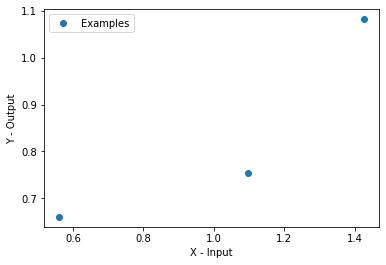

In [2]:
N_in = 1 #Only 1 dimensional input is implemented here!
N_ex = 3

X_max = 1.5
X_ex = X_max*np.random.rand(N_ex) 
Y_ex = X_ex + np.random.rand(N_ex) - 0.5

plt.plot(X_ex,Y_ex,marker='o',linestyle='None',label="Examples")
plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.legend()

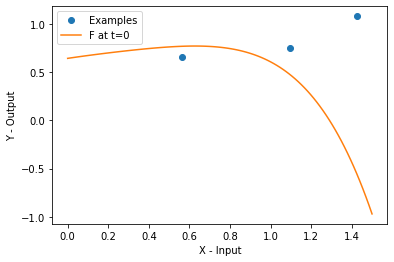

In [3]:
N_par = 6

#In this example we will implement featurs that are polynomials
def phi(x): 
  #Inputs a numpy vector and returns a 
  return np.stack([x**pow for pow in range(N_par) ])

#Phi applied to the examples
Phi_X_ex = phi(X_ex)

#Test points
N_test = 100
X_test = np.linspace(0.0,X_max,N_test)

Phi_X_test = phi(X_test)
K_Xtest_Xtest = 1/N_par * Phi_X_test.T @ Phi_X_test

Theta_0 = np.random.randn(N_par)
F_X_test_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_test

plt.plot(X_ex,Y_ex,marker='o',linestyle='None',label="Examples")
plt.plot(X_test,F_X_test_0,marker='',linestyle='-',label="F at t=0")

plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.legend()

Text(0.5, 1.0, '20 samples at initialization and 2*SD prediction')

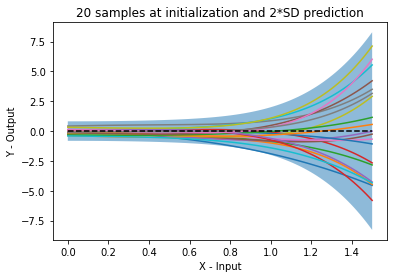

In [4]:
N_samples = 20
for i in range(N_samples):
  Theta_0 = np.random.randn(N_par)
  F_X_test_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_test
  plt.plot(X_test,F_X_test_0,marker='',linestyle='-')

Variance_0 = np.diagonal(K_Xtest_Xtest)
SD = np.sqrt(Variance_0)
plt.plot(X_test,np.zeros_like(X_test),ls='--',color='k')
plt.fill_between(X_test, -2*SD,+2*SD,alpha=0.5)

plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.title(f"{N_samples} samples at initialization and 2*SD prediction") 

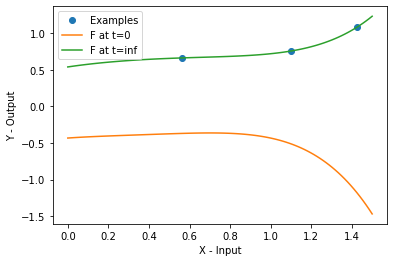

In [5]:
Theta_0 = np.random.randn(N_par)
F_X_test_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_test
Phi_X_ex = phi(X_ex)
F_X_ex_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_ex

#Kernel applied to the examples
K_Xex_Xex = 1/N_par * Phi_X_ex.T @ Phi_X_ex
K_inv = np.linalg.inv(K_Xex_Xex)
K_Xtest_Xex = 1/N_par * Phi_X_test.T @ Phi_X_ex

F_X_test_inf = F_X_test_0 + K_Xtest_Xex @ K_inv @ (Y_ex - F_X_ex_0)

plt.plot(X_ex,Y_ex,marker='o',linestyle='None',label="Examples")
plt.plot(X_test,F_X_test_0,marker='',linestyle='-',label="F at t=0")
plt.plot(X_test,F_X_test_inf,marker='',linestyle='-',label="F at t=inf")


plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.legend()

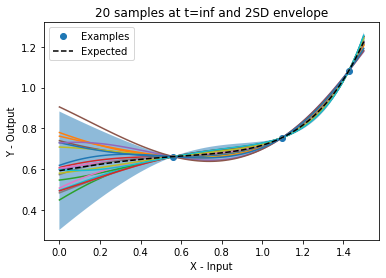

In [6]:
N_samples = 20
plt.plot(X_ex,Y_ex,marker='o',linestyle='None',label="Examples")

for i in range(N_samples):
  Theta_0 = np.random.randn(N_par)
  F_X_test_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_test
  F_X_ex_0 = 1/np.sqrt(N_par)*Theta_0 @ Phi_X_ex

  F_X_test_inf = F_X_test_0 + K_Xtest_Xex @ K_inv @ (Y_ex - F_X_ex_0)

  plt.plot(X_test,F_X_test_inf,marker='',linestyle='-')


Expected_F_inf = K_Xtest_Xex @ K_inv @ (Y_ex)
Exected_Var_inf = np.diagonal(K_Xtest_Xtest - K_Xtest_Xex @ K_inv @ K_Xtest_Xex.T)
SD = np.sqrt(Exected_Var_inf)
plt.plot(X_test, Expected_F_inf, ls = '--',color='k', label="Expected")
plt.fill_between(X_test,Expected_F_inf-2*SD,Expected_F_inf+2*SD,alpha=0.5)

plt.xlabel("X - Input")
plt.ylabel("Y - Output")
plt.title(f"{N_samples} samples at t=inf and 2SD envelope")
plt.legend()